In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = torch.load('./data/test/test/_2020_10_21_20_19_03_0000--s-0/itr_3.pkl')

In [3]:
net

{'trainer/policy': TanhGaussianPolicy(
   (fc0): Linear(in_features=2, out_features=32, bias=True)
   (fc1): Linear(in_features=32, out_features=32, bias=True)
   (last_fc): Linear(in_features=32, out_features=1, bias=True)
   (last_fc_log_std): Linear(in_features=32, out_features=1, bias=True)
 ),
 'trainer/qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=32, bias=True)
   (fc1): Linear(in_features=32, out_features=32, bias=True)
   (last_fc): Linear(in_features=32, out_features=1, bias=True)
 ),
 'trainer/qf2': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=32, bias=True)
   (fc1): Linear(in_features=32, out_features=32, bias=True)
   (last_fc): Linear(in_features=32, out_features=1, bias=True)
 ),
 'trainer/target_qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=32, bias=True)
   (fc1): Linear(in_features=32, out_features=32, bias=True)
   (last_fc): Linear(in_features=32, out_features=1, bias=True)
 ),
 'trainer/target_qf2': ConcatMlp(
   (fc0): L

In [11]:
def Qmap(net,disc=50,bound=1):
    # Returns Qvals for a network
    disc = 50
    bound = 1

    Qvals = np.zeros((disc,disc,11))

    for i_ind, i in enumerate(np.linspace(-bound,bound,disc)):
        for j_ind, j in enumerate(np.linspace(-bound,bound,disc)):
            for a_ind,a in enumerate(np.linspace(-1,1,11)):
                inputs = torch.tensor([[i,j,a]]).float()
                Qvals[i_ind,j_ind,a_ind] = net['trainer/qf1'](inputs).detach().numpy()
    return Qvals

def Pmap(net,disc=50,bound=1):
    # Returns policy from policy network by scanning state space
    disc = 50

    acts = np.zeros((disc,disc))

    for i_ind, i in enumerate(np.linspace(-bound,bound,disc)):
        for j_ind, j in enumerate(np.linspace(-bound,bound,disc)):
            inputs = torch.tensor([[i,j]]).float()
            acts[i_ind,j_ind,a_ind] = net['trainer/policy'](inputs).numpy()
    return acts

# 64 neurons, $\gamma = .9$

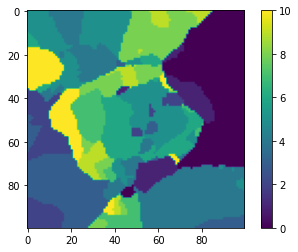

In [19]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

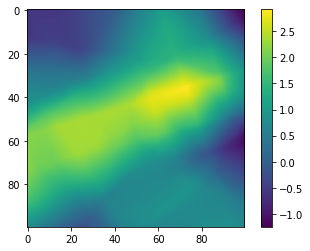

In [23]:
plt.imshow(Qvals[:,:,-1]) 
plt.colorbar()

# 32 neurons, $\gamma = .98$

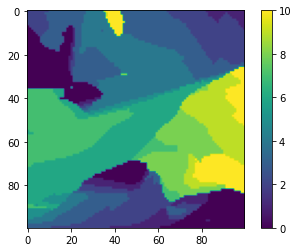

In [6]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

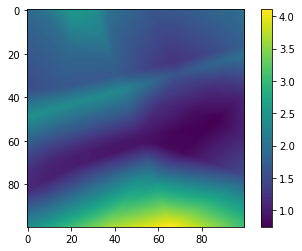

In [8]:
plt.imshow(Qvals[:,:,0]) 
plt.colorbar()

## trial 2

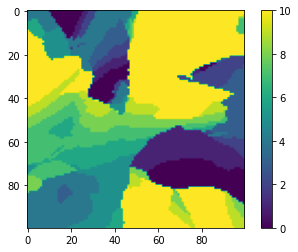

In [4]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

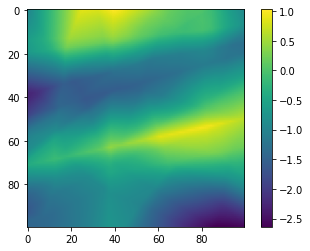

In [5]:
plt.imshow(Qvals[:,:,0]) 
plt.colorbar()

# 32 nrns, alpha carried over

## Q values

on 0
on 1
on 2
on 3


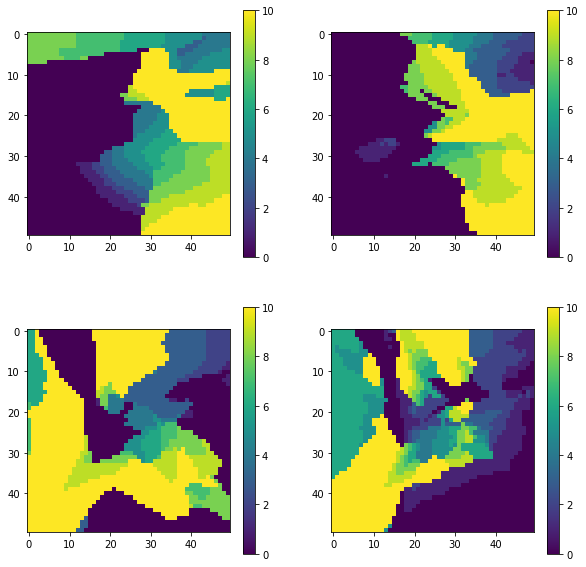

In [7]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches((10,10))
for i in range(4):
    net = torch.load('./data/test/test/_2020_10_21_20_19_03_0000--s-0/itr_'+str(i)+'.pkl')
    print('on',i)
    Qvals = Qmap(net)
    im = ax[i//2,i%2].imshow(np.argmax(Qvals,axis=2))
    fig.colorbar(im,ax=ax[i//2,i%2])

on 0
on 1
on 2
on 3


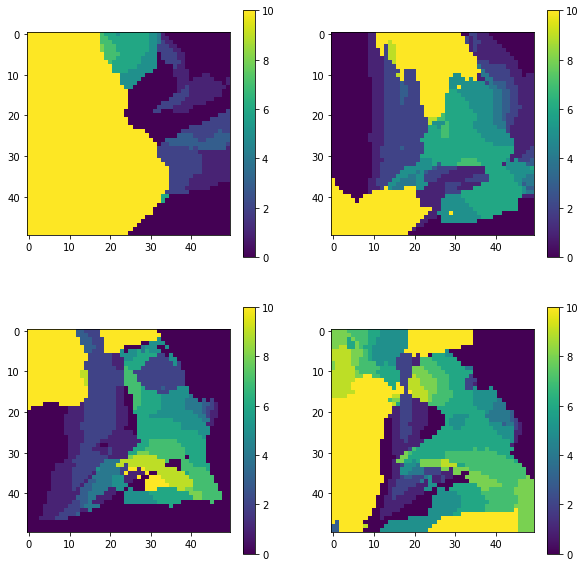

In [8]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches((10,10))
for i in range(4):
    net = torch.load('./data/test/test/_2020_10_21_20_59_06_0000--s-0/itr_'+str(i)+'.pkl')
    print('on',i)
    Qvals = Qmap(net)
    im = ax[i//2,i%2].imshow(np.argmax(Qvals,axis=2))
    fig.colorbar(im,ax=ax[i//2,i%2])

## policies

on 0


AttributeError: 'TanhNormal' object has no attribute 'numpy'

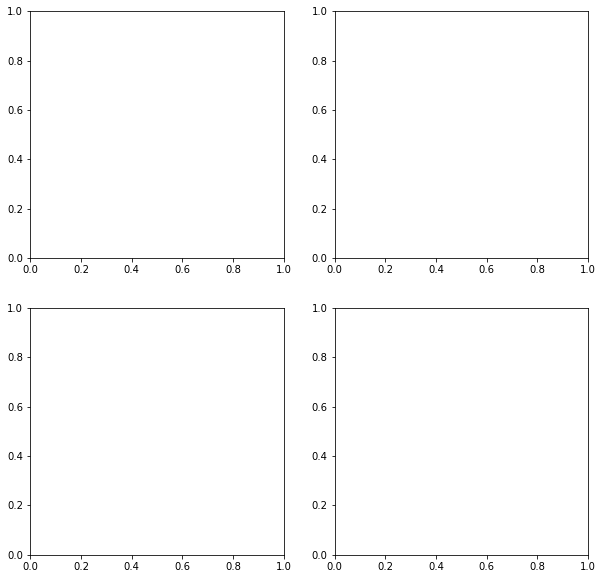

In [13]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches((10,10))
for i in range(4):
    net = torch.load('./data/test/test/_2020_10_21_20_19_03_0000--s-0/itr_'+str(i)+'.pkl')
    print('on',i)
    Pvals = Pmap(net)
    im = ax[i//2,i%2].imshow(Pvals)
    fig.colorbar(im,ax=ax[i//2,i%2])